In [4]:
import json
import requests
import ast
import matplotlib.pyplot as plt
from collections import Counter


In [5]:
from google.colab import userdata
llm_key = userdata.get('llm-key')
llm_endpoint = userdata.get('llm-endpoint')

In [6]:
def generate(
	model: str,
	system: str,
	query: str,
	temperature: float | None = None,
	lastk: int | None = None,
	session_id: str | None = None,
    rag_threshold: float | None = 0.5,
    rag_usage: bool | None = False,
    rag_k: int | None = 0
	):


    headers = {
        'x-api-key': llm_key,
        'request_type': 'call'
    }

    request = {
        'model': model,
        'system': system,
        'query': query,
        'temperature': temperature,
        'lastk': lastk,
        'session_id': session_id,
        'rag_threshold': rag_threshold,
        'rag_usage': rag_usage,
        'rag_k': rag_k
    }

    msg = None

    try:
        response = requests.post(llm_endpoint, headers=headers, json=request)

        if response.status_code == 200:
            res = json.loads(response.text)
            msg = {'response':res['result'],'rag_context':res['rag_context']}
        else:
            msg = f"Error: Received response code {response.status_code}"
    except requests.exceptions.RequestException as e:
        msg = f"An error occurred: {e}"
    return msg

In [20]:
def generate_figurative_dialogue():
  return generate(model = '4o-mini',
        system = 'Generate the dialogue as specified below.',
        query = 'Create 20 different and independent two-message dialogues. The first message in the dialogue, by Speaker 1, should contain a subtle, figurative expression. The second message, which is Speaker 2\'s response, should include a clarifying questions showing that Speaker 2 interpreted Speaker 1\'s message literally. Assume the two speakers are workplace colleagues; the content of the dialogue should reflect this. Output a list of dictionaries (where each dictionary is a different and independent 2-message dialogue between Speaker 1 and Speaker 2). Format your output as follows: [{"Speaker 1": "Message by Speaker 1.", "Speaker 2":"Message by Speaker 2."},{"Speaker 1": "Message by Speaker 1.", "Speaker 2":"Message by Speaker 2."}]',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [21]:
figurative_statements = ast.literal_eval(generate_figurative_dialogue()['response'])

In [22]:
figurative_statements

[{'Speaker 1': 'I think we’re sailing in the same boat for this project.',
  'Speaker 2': 'Are you saying we’re working on the same project together?'},
 {'Speaker 1': "Looks like we're in a bit of a pickle with the budget.",
  'Speaker 2': 'Are you saying the budget is physically stuck somewhere?'},
 {'Speaker 1': 'Our report is still a flower waiting to bloom.',
  'Speaker 2': 'Do you mean the report isn’t finished yet?'},
 {'Speaker 1': 'This client is a tough nut to crack.',
  'Speaker 2': 'Are you suggesting the client literally has a hard shell?'},
 {'Speaker 1': 'Our team’s morale is as low as the basement right now.',
  'Speaker 2': 'Are you saying the morale is actually in the basement?'},
 {'Speaker 1': 'It seems we dropped the ball on that last presentation.',
  'Speaker 2': 'Did we actually drop something during the presentation?'},
 {'Speaker 1': 'I feel like we’re walking on a tightrope with this deadline.',
  'Speaker 2': 'Are you saying we’re literally walking on a rope

In [36]:
def identify_problem_figurative_dialogue(dialogue):
  dialogue_str = '\n'.join([f"{speaker}: {statement}" for speaker, statement in dialogue.items()])
  return generate(model = '4o-mini',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue_str + '\n\nIn the dialogue above, Speaker 1 uses a figurative statement and Speaker 2 responds to it. Decide is at fault for the communication breakdown observed, Speaker 1 or Speaker 2? Explain your decision. Output a dictionary formatted as follows: { "fault":"Speaker #", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [37]:
identify_problem_figurative_dialogue(figurative_statements[0])

{'response': '{\n  "fault": "Speaker 2",\n  "explanation": "Speaker 1 uses a figurative expression, \'sailing in the same boat,\' which typically means that two or more people are in a similar situation or facing the same challenges. However, Speaker 2 takes this metaphor literally and asks for clarification on whether they are actually working on the same project together. This indicates a misunderstanding or lack of familiarity with the expression used by Speaker 1. Therefore, the fault in the communication breakdown lies with Speaker 2, who misinterprets the figurative language rather than engaging with the intent of Speaker 1\'s statement."\n}',
 'rag_context': ''}

# Blunt Statements

In [ ]:

def generate_statements():
  return generate(model = '4o-mini',
        system = 'Generate statements as specified below.',
        query = 'I want you to generate 20 statements that, on a scale from 1(Not Blunt At All) to 5(Extremely Blunt), are rated 5(Extremely Blunt). The statements should be different from each other. They should be simple and straightforward. ONLY return a list of strings, where each string is one statement. Here is a sampel output: ["statement1"],["statement2],...,["statement40"]',
        temperature=0.0,
        lastk=0,
        session_id='GenericSession',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
statements = generate_statements()

In [ ]:
statements_list = ast.literal_eval(statements['response'])

In [ ]:
def rate_statements_autistic(statement):
  return generate(model = '4o-mini',
        system = 'Rate the statement as specified below.',
        query = 'Here is a statement:\n\n' + statement +'\n\nIn your opinion, what chance is there (high, middle, low) that the statement above was made by an autistic person as opposed to a non-autistic person. Provide a one line reasoning too. Return output as follows: ["high/medium/low", "reasoning"]',
        temperature=0.0,
        lastk=0,
        session_id='GenericSession',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)

In [ ]:
ratings_autistic = []
for statement in statements_list:
  print(statement)
  output = rate_statements_autistic(statement)['response']
  try:
    ratings_autistic.append(ast.literal_eval(output))
  except:
    ratings_autistic.append([output])

You're not good at this.
That outfit looks terrible on you.
You really need to lose some weight.
Your cooking is awful.
You're always late and it's annoying.
You have no sense of style.
This project is a complete failure.
You're not as smart as you think.
Your jokes are not funny.
You should stop talking; no one cares.
You're a terrible friend.
This idea is stupid.
You need to get your act together.
You're wasting everyone's time.
Your attitude is toxic.
You can't sing at all.
You're not cut out for this job.
You have no talent.
You're being really selfish.
You should just give up.


In [ ]:
ratings_autistic

[['low',
  'The statement is a general critique that could be made by anyone, regardless of neurodiversity, and does not specifically indicate autistic traits.'],
 ['The request could not be processed because it was blocked by content filtering.'],
 ['The request could not be processed because it was blocked by content filtering.'],
 ['The request could not be processed because it was blocked by content filtering.'],
 ['low',
  'The statement expresses a common frustration that can be articulated by anyone, regardless of neurodiversity, and does not specifically indicate autistic traits.'],
 ['low',
  'The statement about style is more likely to be made by someone who is not autistic, as autistic individuals may have different perspectives on social norms and style.'],
 ['low',
  'The statement reflects a subjective evaluation that could be made by anyone, regardless of neurodiversity, and does not specifically indicate autistic traits.'],
 ['The request could not be processed because 

In [ ]:
def rate_statements_nonautistic(statement):
  return generate(model = '4o-mini',
        system = 'Rate the statement as specified below.',
        query = 'Here is a statement:\n\n' + statement +'\n\nIn your opinion, what chance is there (high, middle or low) that the statement above was made by a non-autistic person as opposed to an autistic person. Provide a one line reasoning too. Return output as follows: ["high/medium/low", "reasoning"]',
        temperature=0.0,
        lastk=0,
        session_id='GenericSession',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)

In [ ]:
ratings_nonautistic = []
for statement in statements_list:
  print(statement)
  output = rate_statements_nonautistic(statement)['response']
  try:
    ratings_nonautistic.append(ast.literal_eval(output))
  except:
    ratings_nonautistic.append(output)

You're not good at this.
That outfit looks terrible on you.
You really need to lose some weight.
Your cooking is awful.
You're always late and it's annoying.
You have no sense of style.
This project is a complete failure.
You're not as smart as you think.
Your jokes are not funny.
You should stop talking; no one cares.
You're a terrible friend.
This idea is stupid.
You need to get your act together.
You're wasting everyone's time.
Your attitude is toxic.
You can't sing at all.
You're not cut out for this job.
You have no talent.
You're being really selfish.
You should just give up.


In [ ]:
ratings_nonautistic

NameError: name 'ratings_nonautistic' is not defined

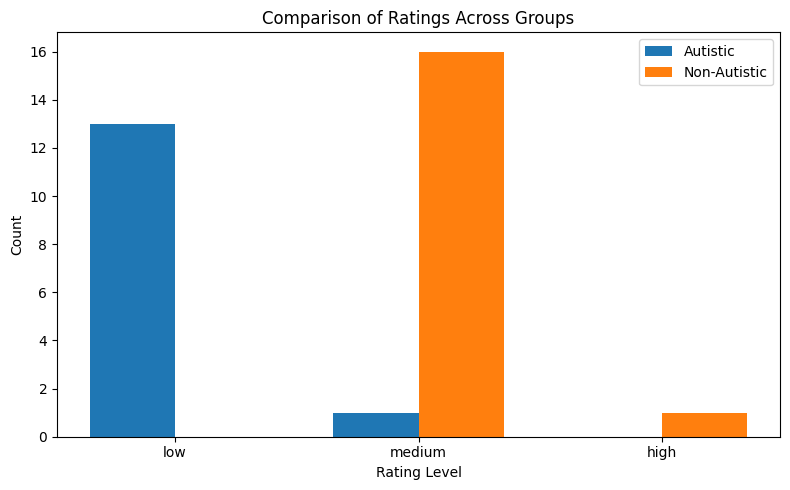

In [ ]:
# Count the frequencies of 'low', 'medium', 'high' for each list
count_autistic = Counter([item[0] for item in ratings_autistic])
count_nonautistic = Counter([item[0] for item in ratings_nonautistic])
# All categories to include in consistent order
categories = ['low', 'medium', 'high']

# Prepare data for plotting
autistic_counts = [count_autistic.get(cat, 0) for cat in categories]
nonautistic_counts = [count_nonautistic.get(cat, 0) for cat in categories]

# Create bar chart
x = range(len(categories))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, autistic_counts, width, label='Autistic')
plt.bar([p + width for p in x], nonautistic_counts, width, label='Non-Autistic')

# Labels and styling
plt.xlabel('Rating Level')
plt.ylabel('Count')
plt.title('Comparison of Ratings Across Groups')
plt.xticks([p + width / 2 for p in x], categories)
plt.legend()

plt.tight_layout()
plt.show()